In [1]:
import pandas as pd
import seaborn as sns
import os
from glob import glob
import matplotlib.pyplot as plt

In [5]:
STRATEGIES = {
    "minimal": "minimalist", 
    "maximal": "full-fledged",
}

english
(57629, 3)
37
37
../../acl_results/generated_definitions/merged/english/minimal/greedy50/english-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/english/minimal/greedy50/english-corpus1.tsv.gz
74
74
../../acl_results/generated_definitions/merged/english/maximal/greedy50/english-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/english/maximal/greedy50/english-corpus1.tsv.gz
111
111
russian
(257469, 3)
222
222
../../acl_results/generated_definitions/merged/russian/minimal/greedy10/russian1-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/russian/minimal/greedy10/russian2-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/russian/minimal/greedy10/russian1-corpus1.tsv.gz
333
333
../../acl_results/generated_definitions/merged/russian/maximal/greedy10/russian1-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/russian/maximal/greedy10/russian2-corpus2.tsv.gz
../../acl_results/generated_definitions/merged/russian/maximal/gr

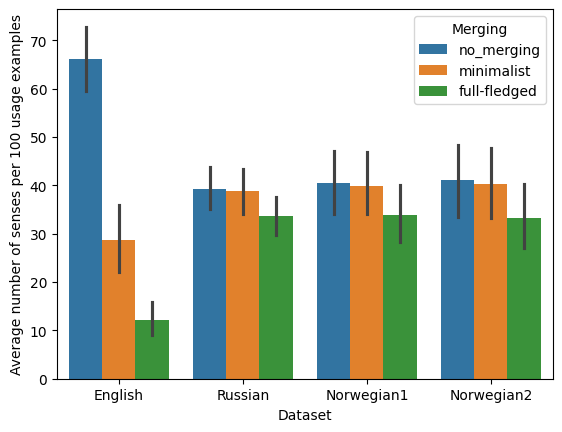

In [6]:
merged_path = "../../acl_results/generated_definitions/merged"
number_of_senses_per_word = []
strategies = []
datasets = []
for language in ("english", "russian", "norwegian1", "norwegian2"):
    print(language)
    english = os.path.join(merged_path, language)
    original = f"../../acl_results/generated_definitions/{language}/greedy/*.tsv.gz"
    corpus_df_original = pd.DataFrame()
    for i, corpus in enumerate(glob(original)):
        corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
        corpus_df_original = pd.concat((corpus_df_original, corpus_df))
    print(corpus_df_original.shape)
    #print(corpus_df_original.head())
    strategies.extend(["no_merging" for _ in range(len(corpus_df_original[0].unique()))])
    datasets.extend([language[0].upper()+language[1:] for _  in range(len(corpus_df_original[0].unique()))])
    for word in corpus_df_original[0].unique():
        this_word = corpus_df_original[corpus_df_original[0]==word]
        number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
    print(len(number_of_senses_per_word))
    print(len(strategies))
    for strategy in ("minimal", "maximal"):
        strategy_path = os.path.join(english, strategy)
        if language == "english":
            gen_strategy_path = os.path.join(strategy_path, "greedy50")
        else:
            gen_strategy_path = os.path.join(strategy_path, "greedy10")
        corpus_df_original = pd.DataFrame()
        for corpus in glob(gen_strategy_path + "/*.tsv.gz"):
            print(corpus)
            corpus_df = pd.read_csv(corpus, sep="\t", compression="gzip", header=None)
            corpus_df_original = pd.concat((corpus_df_original, corpus_df))
        #print(corpus_df_original.head())
        strategies.extend([STRATEGIES[strategy] for _ in range(len(corpus_df_original[0].unique()))])
        datasets.extend([language[0].upper()+language[1:] for _  in range(len(corpus_df_original[0].unique()))])
        for word in corpus_df_original[0].unique():
            this_word = corpus_df_original[corpus_df_original[0]==word]
            number_of_senses_per_word.append(len(this_word[2].unique())/(this_word.shape[0]/100))
        print(len(number_of_senses_per_word))
        print(len(strategies))
        
    
print(len(datasets))
data = pd.DataFrame({f'Average number of senses per 100 usage examples':number_of_senses_per_word, "Merging": strategies, "Dataset": datasets},
             )
print(data.head())
g = sns.barplot(
    data=data,
    hue="Merging",
    x="Dataset",
    y='Average number of senses per 100 usage examples' 
                )
        #plt.show()
out = "graph.pdf"
print(f"saving to {out}")
plt.savefig(out, bbox_inches='tight')